[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

# matplotlib을 이용해서 설정했던 것
# plt.rc("font", family="D2Coding")
# plt.rc("axes", unicode_minus=False)

rc = {"axes.unicode_minus": False}
sns.set(font='Malgun Gothic', style="darkgrid", rc=rc)

<AxesSubplot:title={'center':'한글제목'}>

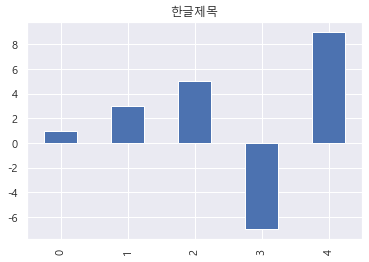

In [3]:
# 한글폰트 설정 확인을 합니다.

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글제목")

In [ ]:
# 그래프가 선명하게 표시되도록 합니다.



## 데이터 로드

In [284]:
# 데이터를 로드해서 df 라는 변수에 담습니다.


df_park = pd.read_csv("../resources/전국도시공원정보표준데이터.csv", encoding="cp949")
df_park.shape

(19593, 19)

In [285]:
# 미리보기를 합니다.

df_park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41135-00098,샘터공원,어린이공원,NaN,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시
1,29200-00061,제2풍영정,근린공원,NaN,"광주광역시 광산구 운남동 793-1, 780-1",35.177519,126.811916,26200.7,"배드민턴장, 농구장","조합놀이대, 기타놀이기구",NaN,야외무대,관리사무소,1997-08-12,광주광역시 광산구청,062-960-8704,2020-07-16,3630000,광주광역시 광산구
2,29200-00062,맑은샘,어린이공원,광주광역시 광산구 풍영로 63,광주광역시 광산구 월곡동 681-1,35.178777,126.810674,1500.1,NaN,"조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구


## Pandas Profiling - 판다스를 통해 기술통계 값을 리포트로 작성해줌
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [6]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다. => 2.5.0   
import pandas_profiling

pandas_profiling.__version__

'2.9.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [7]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.

from pandas_profiling import ProfileReport

# from matplotlib import rc

# # rc = {"axes.unicode_minus": False}

# # font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family='Malgun Gothic')
# # sns.set(font=font_name, style="darkgrid", rc=rc)
# # matplotlib.rcParams['axes.unicode_minus'] = False

rc = {"axes.unicode_minus": False}
sns.set(font='Malgun Gothic', style="darkgrid", rc=rc)

%time profile = ProfileReport(df_park, title = "도시 공원 표준 데이터")
profile.to_file(output_file="../resources/05-park_profile.html")

Wall time: 30.9 ms


C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 miss

C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50896 missin

C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47

C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44288 missing from current fon

C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\STUDENTS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missi

## 기본 정보 보기

In [286]:
# info로 기본 정보를 봅니다.

df_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19593 entries, 0 to 19592
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          19593 non-null  object 
 1   공원명           19593 non-null  object 
 2   공원구분          19593 non-null  object 
 3   소재지도로명주소      7730 non-null   object 
 4   소재지지번주소       18672 non-null  object 
 5   위도            19593 non-null  float64
 6   경도            19593 non-null  float64
 7   공원면적          19593 non-null  object 
 8   공원보유시설(운동시설)  5046 non-null   object 
 9   공원보유시설(유희시설)  7152 non-null   object 
 10  공원보유시설(편익시설)  5397 non-null   object 
 11  공원보유시설(교양시설)  1245 non-null   object 
 12  공원보유시설(기타시설)  3166 non-null   object 
 13  지정고시일         16604 non-null  object 
 14  관리기관명         18379 non-null  object 
 15  전화번호          17934 non-null  object 
 16  데이터기준일자       19593 non-null  object 
 17  제공기관코드        19593 non-null  object 
 18  제공기관명         19593 non-nu

In [9]:
# 결측치의 수를 구합니다.

df_park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        11863
소재지지번주소           921
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    14547
공원보유시설(유희시설)    12441
공원보유시설(편익시설)    14196
공원보유시설(교양시설)    18348
공원보유시설(기타시설)    16427
지정고시일            2989
관리기관명            1214
전화번호             1659
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [10]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

df_park.isnull().mean() * 100

# 세자리까지만 잘라서 보고 싶다면
round(df_park.isnull().mean() * 100, 3)

관리번호             0.000
공원명              0.000
공원구분             0.000
소재지도로명주소        60.547
소재지지번주소          4.701
위도               0.000
경도               0.000
공원면적             0.000
공원보유시설(운동시설)    74.246
공원보유시설(유희시설)    63.497
공원보유시설(편익시설)    72.454
공원보유시설(교양시설)    93.646
공원보유시설(기타시설)    83.841
지정고시일           15.255
관리기관명            6.196
전화번호             8.467
데이터기준일자          0.000
제공기관코드           0.000
제공기관명            0.000
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [11]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

<AxesSubplot:>

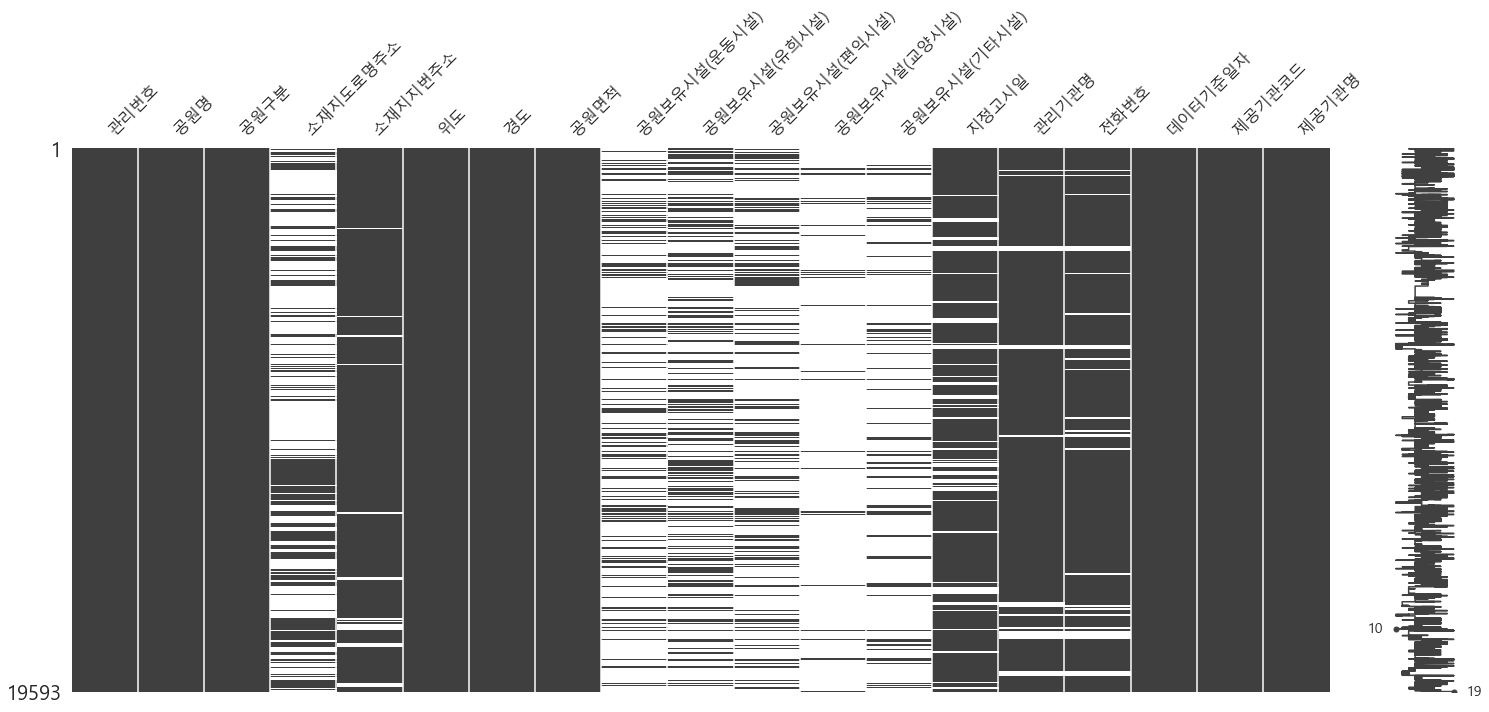

In [12]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.

import missingno as msno
msno.matrix(df_park)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

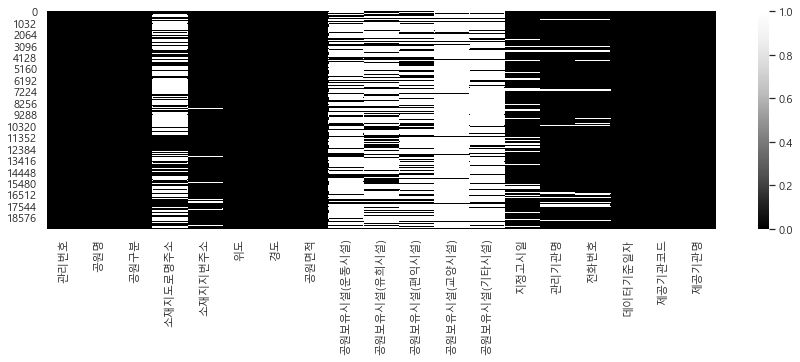

In [13]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.

# 결측치를 하얀색으로 만들기 위해서 Greys_r(여기서 r은 reverse)

plt.figure(figsize=(15,4))
sns.heatmap(df_park.isnull(), cmap="Greys_r")  # 색상 cmap = "Blues_r"  도 해보기

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [154]:
# 전체 컬럼명을 출력해 봅니다.

df_park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [155]:
# drop 으로 'Unnamed: 19' 를 제거하기 - 동강에서만 가능

# df_park = df_park.drop("Unnamed: 19", axis=1)
# df_park.columns

## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [156]:
# 도로명 주소의 널값 수

df_park["소재지도로명주소"].isnull().sum()

11863

In [157]:
# 지번 주소의 널값 수

df_park["소재지지번주소"].isnull().sum()

921

In [158]:
# 내가 한 것 - 소재지도로명주소가 null이 아닌 갯수(위에서 info로 봤던 정보 참고해도 되고)

df_park[df_park["소재지도로명주소"].notnull()]["소재지도로명주소"].count()

7730

In [159]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.

df_park[(df_park["소재지도로명주소"].notnull()) & (df_park["소재지지번주소"].notnull())].shape

(6809, 19)

In [160]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.

df_park["소재지도로명주소"] = df_park["소재지도로명주소"].fillna(df_park["소재지지번주소"])

# "소재지도로명주소"의 결측치수를 세어봅니다.
df_park["소재지도로명주소"].isnull().sum()

0

In [161]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.

df_park[(df_park["소재지도로명주소"].isnull()) & (df_park["소재지지번주소"].isnull())].shape

(0, 19)

In [162]:
df_park["소재지지번주소"] = df_park["소재지지번주소"].fillna(df_park["소재지도로명주소"])

# "소재지지번주소"의 결측치수를 세어봅니다.
df_park["소재지지번주소"].isnull().sum()

0

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [163]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

# 일반적인 split
# df_park["소재지도로명주소"].str.split()

# 잘라진 것의 도를 가져오기 위해 시도하면 원하는 대로 가져오지 않음
# df_park["소재지도로명주소"].str.split()[0]


# expand=True : 내부에서 나눠진 값의 첫번째 것을 가져오라는 의미
# df_park["소재지도로명주소"].str.split(" ", expand=True)

df_park["시도"] = df_park["소재지도로명주소"].str.split(" ", expand=True)[0]
df_park[["소재지도로명주소","시도"]].head(3)

,소재지도로명주소,시도
0,경기도 성남시 분당구 구미동 87,경기도
1,"광주광역시 광산구 운남동 793-1, 780-1",광주광역시
2,광주광역시 광산구 풍영로 63,광주광역시


In [164]:
# 구군 가져오기

df_park["구군"] = df_park["소재지도로명주소"].str.split(" ", expand=True)[1]
df_park[["소재지도로명주소","시도","구군"]].head(3)

,소재지도로명주소,시도,구군
0,경기도 성남시 분당구 구미동 87,경기도,성남시
1,"광주광역시 광산구 운남동 793-1, 780-1",광주광역시,광산구
2,광주광역시 광산구 풍영로 63,광주광역시,광산구


In [165]:
# 시도 데이터의 빈도수 세어보기

df_park["시도"].value_counts()

경기도        3900
전라남도       2036
경상남도       1860
서울특별시      1856
충청남도       1691
전라북도       1117
충청북도        915
울산광역시       883
경상북도        880
광주광역시       856
강원도         754
부산광역시       689
인천광역시       687
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
-            40
부산시           1
Name: 시도, dtype: int64

* value_counts() or unique() 를 통해 파생변수 설정이 제대로 되었는지 확인하기
* 여기서 이상이 발생하면 다시 전처리를 하는 것

<hr style="border-color:red;border-width:2px">

* 동강에서는 없었던 부분인데 데이터가 달라져서 이런거 같음
* 소재지도로명주소에 - 값이 들어가 있어서 저위에서 isnull() 에 포함 되지 않음 => 따라서 그 후 작업에서 모두 제외되어 버림
* 그래서 이 아래 작업들 시행한 것

In [166]:
# 시도가 안들어간 데이터를 확인하기 : "-" => 경상북도칠곡군

df_park[df_park["시도"] == "-"]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
1799,47850-00019,중리제3공원(화산서당공원),어린이공원,-,경상북도 칠곡군 석적읍 중리 230,36.076219,128.419742,620,-,"흔들놀이기구, 오르기 기구",화장실,-,-,1993-01-16,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1800,47850-00020,중리제4공원(게이트볼장공원),어린이공원,-,경상북도 칠곡군 석적읍 중리 238-4,36.073796,128.421529,3612.4,게이트볼장,"조합놀이기구, 그네, 오르기기 기구",화장실,-,-,1993-01-16,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1801,47850-00021,중리제5공원(테니스장공원),어린이공원,-,경상북도 칠곡군 석적읍 중리 247-3,36.072663,128.414084,3271,테니스장,조합놀이기구,화장실,-,-,1993-01-16,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1802,47850-00022,중리제6공원(배수지공원),어린이공원,-,경상북도 칠곡군 석적읍 중리 263-2,36.073197,128.408574,3343.2,-,"조합놀이기구, 그네, 시소, 흔들놀이기구",화장실,-,-,1993-01-16,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1803,47850-00023,남율제1공원,어린이공원,-,경상북도 칠곡군 석적읍 남율리 143,36.066919,128.401796,4388,-,"조합놀이기구, 흔들놀이기구",-,-,-,1997-08-09,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1804,47850-00024,남율제2공원,어린이공원,-,경상북도 칠곡군 석적읍 남율리 산38,36.070102,128.409498,3406,-,"조합놀이기구, 그네, 흔들놀이기구",-,-,-,1997-08-09,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1805,47850-00025,남율제3공원,어린이공원,-,경상북도 칠곡군 석적읍 남율리 235,36.064404,128.402607,4413,-,조합놀이기구,-,-,-,1997-08-09,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1806,47850-00026,남율제4공원,어린이공원,-,경상북도 칠곡군 석적읍 남율리 산 45-13,36.066446,128.409255,2033,-,"조합놀이기구,그네, 시소",-,-,-,1997-08-09,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1807,47850-00027,남율제5공원,어린이공원,-,경상북도 칠곡군 석적읍 남율리 산 44-20,36.067938,128.411450,3516,-,"조합놀이기구, 그네, 시소",-,-,-,1997-08-09,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None
1808,47850-00028,중리제7공원(장승백이공원),어린이공원,-,경상북도 칠곡군 석적읍 중리 161-16,36.077882,128.401534,2285,-,"조합놀이기구, 그네, 시소",화장실,-,-,1998-07-20,칠곡군,054-979-6832,2020-07-16,5220000,경상북도 칠곡군,-,None


In [167]:
# 소재지도로명 주소에 "-" 로 들어간 것은 다시 소재지지번주소 넣어주기

df_park.loc[df_park["소재지도로명주소"] == "-","소재지도로명주소"] = df_park["소재지지번주소"]

In [168]:
# 문자열 자르기
df_park["시도"] = df_park["소재지도로명주소"].str.split(" ", expand=True)[0]
df_park["구군"] = df_park["소재지도로명주소"].str.split(" ", expand=True)[1]

In [169]:
# 확인
df_park[df_park["구군"] == "칠곡군"][["소재지도로명주소","시도","구군"]].head()

,소재지도로명주소,시도,구군
1799,경상북도 칠곡군 석적읍 중리 230,경상북도,칠곡군
1800,경상북도 칠곡군 석적읍 중리 238-4,경상북도,칠곡군
1801,경상북도 칠곡군 석적읍 중리 247-3,경상북도,칠곡군
1802,경상북도 칠곡군 석적읍 중리 263-2,경상북도,칠곡군
1803,경상북도 칠곡군 석적읍 남율리 143,경상북도,칠곡군


<hr style="border-color:red;border-width:2px">

In [170]:
# 부산시는 "부산광역시"로 변경하기

df_park["시도"] = df_park["시도"].replace("부산시","부산광역시")

In [171]:
# 시도 데이터의 빈도수 세어보기

df_park["시도"].value_counts()

경기도        3900
전라남도       2036
경상남도       1860
서울특별시      1856
충청남도       1691
전라북도       1117
경상북도        920
충청북도        915
울산광역시       883
광주광역시       856
강원도         754
부산광역시       690
인천광역시       687
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

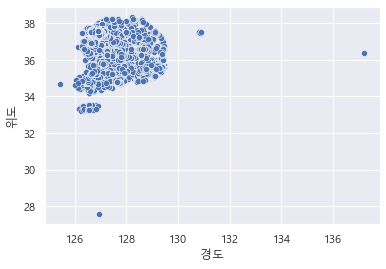

In [172]:
# 위경도 시각화

sns.scatterplot(data=df_park, x="경도", y="위도")

In [173]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.

df_park_extract = df_park[(df_park["위도"] > 32) & (df_park["경도"] < 132)].copy()
df_park_extract.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,41135-00098,샘터공원,어린이공원,경기도 성남시 분당구 구미동 87,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시,경기도,성남시
1,29200-00061,제2풍영정,근린공원,"광주광역시 광산구 운남동 793-1, 780-1","광주광역시 광산구 운남동 793-1, 780-1",35.177519,126.811916,26200.7,"배드민턴장, 농구장","조합놀이대, 기타놀이기구",NaN,야외무대,관리사무소,1997-08-12,광주광역시 광산구청,062-960-8704,2020-07-16,3630000,광주광역시 광산구,광주광역시,광산구


<AxesSubplot:xlabel='경도', ylabel='위도'>

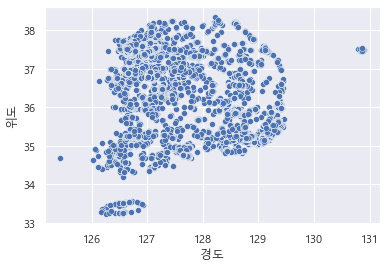

In [174]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함

sns.scatterplot(data=df_park_extract, x="경도", y="위도")

* 이상치를 확인하는 또 다른 방법

In [175]:
df_park[["위도","경도"]].describe()

,위도,경도
count,19593.000000,19593.000000
mean,36.338749,127.524585
std,1.064608,0.875285
min,27.551606,125.430955
25%,35.255135,126.881875
50%,36.374582,127.123134
75%,37.400372,128.353493
max,38.350990,137.202661


In [176]:
# 위도와 경도의 요약값을 describe 로 봅니다.

df_park_extract.describe()

,위도,경도
count,19591.000000,19591.000000
mean,36.339196,127.524121
std,1.062810,0.872584
min,33.218670,125.430955
25%,35.255238,126.881778
50%,36.374597,127.123134
75%,37.400373,128.353451
max,38.350990,130.905955


In [177]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.

df_park[(df_park["위도"] < 32) | (df_park["경도"] > 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
1647,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258,NaN,NaN,NaN,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2020-07-16,5710000,충청북도 청주시,충청북도,청주시
16859,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590,NaN,NaN,NaN,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구


* 위 데이터에서 위,경도의 값을 다시 받아와야 함

## 날짜 데이터 다루기

In [178]:
# 지정고시일의 데이터 타입을 봅니다.

df_park["지정고시일"].head(1)

0    1991-01-08
Name: 지정고시일, dtype: object

In [179]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.

df_park["지정고시일"] = pd.to_datetime(df_park["지정고시일"])
df_park["지정고시일"].head(1)

0   1991-01-08
Name: 지정고시일, dtype: datetime64[ns]

In [180]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.
# 여기서 결과가 float 로 나온 이유는 값 중에 null 인게 있고, 그래서 이런식으로 나오는 것

df_park["고시연도"] = df_park["지정고시일"].dt.year
df_park["고시월"] = df_park["지정고시일"].dt.month
df_park[["지정고시일","고시연도","고시월"]].head()

,지정고시일,고시연도,고시월
0,1991-01-08,1991.0,1.0
1,1997-08-12,1997.0,8.0
2,1997-08-12,1997.0,8.0
3,1997-08-12,1997.0,8.0
4,1997-08-12,1997.0,8.0


In [181]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.

df_park.loc[df_park["공원명"].str.contains("화랑"), ["공원명","고시연도"]]

,공원명,고시연도
239,판교제8호(화랑)공원,2004.0
1159,화랑,1991.0
3846,화랑공원,1969.0
6473,화랑공원,2010.0
7360,화랑,2004.0
7657,화랑공원,1972.0
18724,화랑공원,1980.0


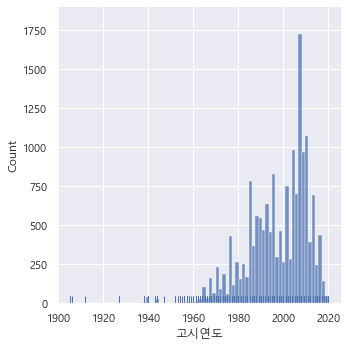

In [182]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
# distplot(동강) 은 삭제되었다고 나옴

sns.displot(df_park.loc[df_park["고시연도"].notnull(),"고시연도"], rug=True)

* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [183]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.


year_month = pd.pivot_table(df_park, index="고시연도", columns="고시월", values="공원명", aggfunc="count")
year_month   # 1900 초반대의 공원에는 NaN 이 많은 상황

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
1905.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1906.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1912.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1938.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,33.0,30.0,9.0,21.0,20.0,25.0,15.0,13.0,31.0,18.0,10.0,55.0
2017.0,9.0,3.0,11.0,20.0,4.0,21.0,15.0,10.0,12.0,6.0,25.0,20.0
2018.0,5.0,9.0,4.0,3.0,8.0,17.0,1.0,5.0,23.0,26.0,4.0,40.0


In [184]:
# 데이터가 많기 때문에 2000년보다 크고 2020년보다 작은 연도의 데이터만 봅니다.

year_month = year_month[(year_month.index > 2000) & (year_month.index < 2020)]
round(year_month)

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,50.0,41.0,7.0,67.0,17.0,17.0,7.0,18.0,38.0,37.0,38.0,52.0
2002.0,37.0,19.0,18.0,10.0,29.0,17.0,49.0,21.0,7.0,40.0,59.0,55.0
2003.0,40.0,13.0,17.0,18.0,15.0,34.0,6.0,8.0,7.0,16.0,56.0,52.0
2004.0,62.0,26.0,20.0,24.0,13.0,24.0,9.0,74.0,10.0,26.0,64.0,120.0
2005.0,72.0,27.0,11.0,22.0,42.0,35.0,16.0,42.0,22.0,39.0,62.0,123.0
2006.0,86.0,35.0,37.0,32.0,59.0,47.0,29.0,36.0,26.0,52.0,128.0,131.0
2007.0,73.0,12.0,11.0,45.0,18.0,57.0,66.0,77.0,82.0,164.0,240.0,109.0
2008.0,163.0,48.0,78.0,43.0,30.0,111.0,18.0,61.0,33.0,27.0,16.0,147.0
2009.0,65.0,34.0,161.0,126.0,75.0,63.0,38.0,43.0,117.0,28.0,79.0,139.0


In [185]:
# 판다스 스타일링 : 값이 많으면 진하게, 적으면 옅게

year_month.style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,50.000000,41.000000,7.000000,67.000000,17.000000,17.000000,7.000000,18.000000,38.000000,37.000000,38.000000,52.000000
2002.0,37.000000,19.000000,18.000000,10.000000,29.000000,17.000000,49.000000,21.000000,7.000000,40.000000,59.000000,55.000000
2003.0,40.000000,13.000000,17.000000,18.000000,15.000000,34.000000,6.000000,8.000000,7.000000,16.000000,56.000000,52.000000
2004.0,62.000000,26.000000,20.000000,24.000000,13.000000,24.000000,9.000000,74.000000,10.000000,26.000000,64.000000,120.000000
2005.0,72.000000,27.000000,11.000000,22.000000,42.000000,35.000000,16.000000,42.000000,22.000000,39.000000,62.000000,123.000000
2006.0,86.000000,35.000000,37.000000,32.000000,59.000000,47.000000,29.000000,36.000000,26.000000,52.000000,128.000000,131.000000
2007.0,73.000000,12.000000,11.000000,45.000000,18.000000,57.000000,66.000000,77.000000,82.000000,164.000000,240.000000,109.000000
2008.0,163.000000,48.000000,78.000000,43.000000,30.000000,111.000000,18.000000,61.000000,33.000000,27.000000,16.000000,147.000000
2009.0,65.000000,34.000000,161.000000,126.000000,75.000000,63.000000,38.000000,43.000000,117.000000,28.000000,79.000000,139.000000


## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [186]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다. 

import re

### 공원 보유시설

In [187]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.

pd.options.display.max_columns = 50

In [188]:
# 데이터를 미리보기 합니다.

df_park.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,41135-00098,샘터공원,어린이공원,경기도 성남시 분당구 구미동 87,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시,경기도,성남시,1991.0,1.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [189]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.

df_park["공원보유시설(운동시설)"].value_counts().tail(5)

마라톤운동기,온몸근육풀기,온몸역기올리기,온몸허리돌리기    1
체력단련시설+운동장(축구골대,농구대)             1
배드민턴장 1개소, 체력단련시설 5기             1
농구장, 게이트볼장, 체력단련기구               1
족구장+배드민턴장+게이트볼장                  1
Name: 공원보유시설(운동시설), dtype: int64

In [190]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.

gym = df_park["공원보유시설(운동시설)"].unique().tolist()

gym = str(gym)

gym[:1300]

gym[2000:]

"5종', '마레트골프장 외 5종', '운동시설', '야외체육시설3', '야외체육시설4', '게이트볼장 외 4종', '게이트볼장 외3종', '철봉 외7종', '체력단련장 외2종', '야외체육시설', '운동시설물 외1종', '게이트볼장 외4종', '웨밍암 외4종', '서핑롤링머신 외2종', '지압보도외6종', '농구대외3종', '에어워킹 외2종', '어깨관절놀이 외2종', '어깨관절놀이 외3종', '농구대외 5종', '평행봉외 7종', '야외체육시설물', '윗몸일으키기외7종', '평행봉외1종', '스텝싸이클 등 5', '싸이클링 외 3종', '트위스트외 4종', '다목적구장외1종', '운동시설물', '축구장 외5종', '배드민턴장 외1종', '생활체육시설 외2종', '축구장 외4종', '평행봉 외2종', '스텝싸이클외4종', '농구대외 8종', '바디실업외 5종', '노르딕머신외1종', '베드민턴장외3종', '노르딕머신외2종', '허리돌리기외5종', '싸이클링 외 5종', '싸이클링 외2종', '싸아클링 외2종', '베드민턴및 포스트', '싸이클링외 6종', '미니축구장', '미니축구장, 농구장', '축구장,농구장,배구장,인라인장', '농구장, 게이트볼장,체력단련시설', '운동장, 게이트볼장, 체력단련장', '배드민턴장, 체력단련장', '배드민턴장,운동장,체력단련시설', '게이트볼장, 농구장, 족구장,체력단련시설', '실내 게이트볼장,체력단련시설', '배드민턴장, 야외헬스장', '농구장, 체력단련시설', '다목적운동장2, 인라인장, 축구장,풋살장,배드민턴장, 족구장, 게이트볼장2,농구장,체력단련시설', '다목적운동장, 생홀체육관, 배드민턴장', '게이트볼장, 농구대, 체력단련시설', '게이트볼장, 농구장,체력단련시설', '운동기구 5종', '운동기구 4종', '운동기구 6종', '운동기구 10종', '체력단련장, 체력단련시설, 국궁장', '농구장, 배드민턴장,체력단련시설', '배드민턴장, 체력단련시설', '배드민턴장, 다목적운동장,체력단련시설', '19', '잔

In [191]:
# 특수문자로 구분된 값을 , 로 구분되게 변경합니다. ( +, /)
# replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다.

# '철봉/팔굽혀펴기/평행봉/허리돌리기/배근력대'   =>  '철봉,팔굽혀펴기,평행봉,허리돌리기,배근력대'
# '게이트볼장, 농구장, 배드민턴장'  => '게이트볼장,농구장,배드민턴장'  replace(", "," ")

gym = gym.replace("/",",").replace("+",",").replace("'",",").replace(" ",",")
# gym[:1300]
gym[3000:]

'운동장,,,,축구장,풋살장,족구장,농구장,,,,족구장,,,,다목적운동장,족구장,축구장,,,,운동장,축구장,,배드민턴장,,,,농구대,1,,,,배드민턴장,1,,,,인라인장,,농구대,1,,,,운동기구2종,,,,운동장,,배구장,농구장,,,,농구대,2,,,,풋살구장,체력단련장,체육관,(게이트볼삭제요청),,,,운동장,,체력단련장,,,,게이트볼장,,운동기구,2종,,,,다목적운동장,수영장,실내베드민턴장,,웅동기구12종,,,,체력단련시설,8개,,,,게이트볼장,멀티코트,,,,운동장,게이트볼장,,,,체력단련장,배구장,게이트볼장,베드민턴장,,,,체력단련장,,다이나트랙,베드민턴장,,,,배드민턴장,,운동장,,,,다목적운동장,베드민턴장,체력단련장,,,,농구장,다목적운동장,운동기구,6종,,,,골프연습장,,눈썰매장,체력단련장,궁도장,실내베드민턴장,인라인스케이트장,,,,농구장,족구장,,,,운동기구,8,,,,운동기구,3,,,,운동기구,9,,,,체력단련시설,운동장(농구대),,,,실내다목적체육관,체력단련시설,,,,야외헬스형운동기구,21개,,,,야외헬스형운동기구,20개,,다목적운동장,,조깅트랙,,,,배드민턴장,,게이트볼장,,야외헬스형,운동기구,98개,,,,야외헬스형운동기구,14개,,,,야외헬스형운동기구,25개,,,,테니스장,,골프장,,승마장,,,,벤치,,,,실내체육관,,,,생활운동시설,,,,축구장,실내배드민턴장,체력단련시설,,,,하늘걷기,마라톤운동,,,,하늘걷기,,마라톤운동,,,,생활체육관,,,,농구장,베트민턴장,,,,풋살장,,농구장,,족구장,,,,배드민턴장,2개소,,,,야구장,,축구장,,다목적구장,,,,베드민턴장,,,,축구장,,베드민턴장,,농구장,,족구장,게이트볼장,다목적구장,,,,운동기구,등,,,,축구장,실내배드민턴장,배구장,씨름장,농구장,체력단련장,,,,다목적운동장,체력단련시설,,,,농구장,,배드민턴장,,축구장,등,,,,허리돌리기,,철봉,,평행봉,,역기올리기,등,,,,철봉,,평행봉,공중걷기,,허리돌리기,등,,,,철봉,,평행봉,,허리돌리기,,공중걷기,등,,,,허리돌리기,,다리흔들기,,다리올리기

In [192]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다.
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다.
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.

# 숫자를 빈문자열로, [ ] 대괄호 없애기, - 없애기, nan 없애기, . 없애기
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
# ,가 두 개 이상 들어가면 , 로 바꾸기
gym = re.sub(",{2,}", ",", gym)
gym[:1000]

',배드민턴장,농구장,배드민턴장,배드민턴장,게이트볼장,인라인스케이트장,배드민턴장,운동장,농구장,다목적운동장외,종,게이트볼장,농구대,배드민턴장,게이트볼장,롤러스케이트장,다목적운동장,운동장,다목적광장,체력단련시설,종,풋살경기장,족구장,게이트볼장,체력단련장,체력단련시설,게이트볼장,농구장,테니스장,인조잔디구장,천연잔디구장,축구장,농구장,농구장,운동장,게이트볼장,축구장,테니스장,다목적운동장,다목적운동장,테니스장,배드민턴장,배드민턴장,게이트볼장,농구장,테니스장,축구장,다목적운동장,궁도장,테니스장,체련단련장,다목적운동장,롤러스케이트장,다목적운동장,체력단련장,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,다목적구장,테니스장,암벽등반,다목적운동장,배구장,배드민턴장,골프연습장,국궁장,골프연습장,체육시설물,체력단련장,배드민턴장,체력단련장,게이트볼잘,생활체육시설지,실내체육관,체력단련장,운동장,배드민턴장,놀이터,게이트볼장,배드민턴장,운동체육시설,테니스장,배구장,체육센타,게이트볼장,배드민턴장,게이트볼장,체력단련장,노르딕머신외종,노르딕머신외,종,트위스트외종,평행봉,외종,싸이클링외,종,크로스컨트리외종,풋살경기장,운동시설물,운동시설지,농구장,철봉외종,철봉,외,종,팔굽혀펴기,외종,허리돌리기,외종,스트레칭로라외종,농구대외종,철봉외,종,조종,윗몸일으키기,외종,윗몸일으키기,외종,다리굽혀펴기,외종,크로스컨트리,외종,공중걷기,외종,게이트볼장,외종,에어서핑,외종,조종,조종,조종,조종,조종,조종,조종,조종,개방형,체육관,체력단련장,축구장,체력단련장(A~C),다목적구장,농구장,배드민턴장,운동공간,족구장,배구장,배드민턴장,체력단련시설,인라인스케이트장,운동장,족구장,농구장,체력단련시설,운동장,축구장,체력단련시설,실내배드민턴장,게이트볼장,체력단련시설,농구장,롤러스케이트장,농구장,스포츠파크,배드민턴장,인라인스케이트장,축구장,씨름장,배구,배스민턴,축구장,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외운동기구,축구장,테니스장,배구,배드

In [193]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.
# 도시공원에 있는 가장 많은 운동시설은 배드민턴장 이다

gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장    259
농구장      238
운동기구     176
게이트볼장    159
하늘걷기     155
dtype: int64

<AxesSubplot:>

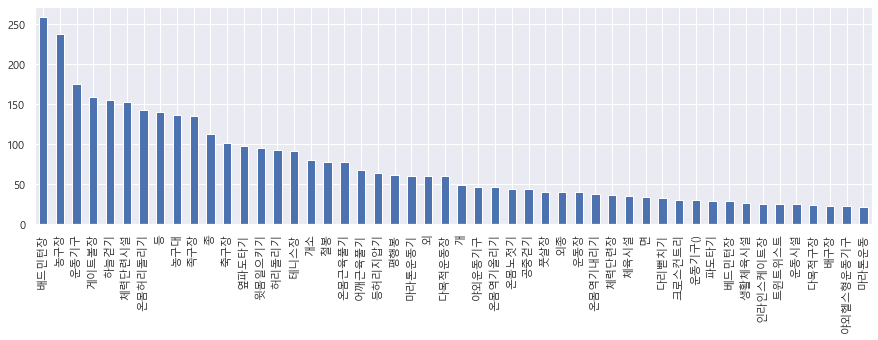

In [194]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.
# 빈도수 50개를 시각화 해서 보면 전처리를 어떤 걸 해야할지 조금 더 잘 보임(등, 종, 개, 외)

gym_count.head(50).plot.bar(figsize=(15,4))

### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

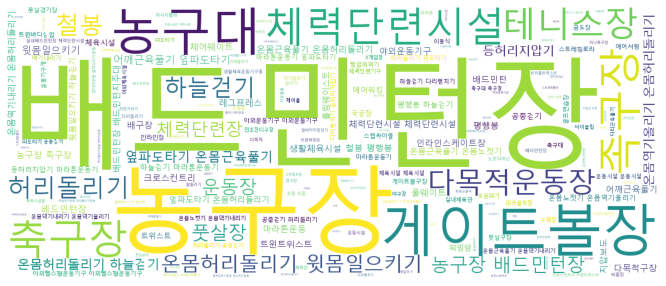

In [195]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

# stopwords : 워드클라우드 그릴때 빼야 하는 글자
word_draw = WordCloud(font_path=r"C:\Windows\Fonts\malgun.ttf", width=1200,height=500,
                      stopwords=["운동기구","개소","외종","개","등","종","외","면"],
                      background_color="white")
word_draw.generate(gym)

# 이 크기대로 그리지는 않지만, WordCloud() 안에 있는 width,height가 작동하기 위해선 필요함
plt.figure(figsize=(15,5))
plt.imshow(word_draw)
plt.axis("off")  # 축을 그리지 말것

plt.show()

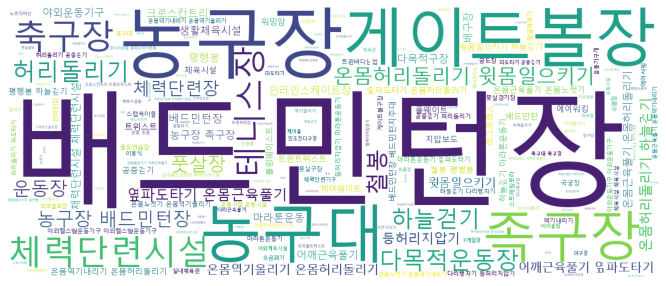

In [196]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.
# random_state=42 : 그릴때마다 다르게 그려지는 워드 클라우드를 항상 같은 형태로 그리도록 설정

def wordcloud(data, width=1200, height=500):
    # stopwords : 워드클라우드 그릴때 빼야 하는 글자
    word_draw = WordCloud(font_path=r"C:\Windows\Fonts\malgun.ttf", width=width,height=height,
                          stopwords=["운동기구","개소","외종","개","등","종","외","면"],
                          background_color="white", random_state=42)
    word_draw.generate(gym)

    # 이 크기대로 그리지는 않지만, WordCloud() 안에 있는 width,height가 작동하기 위해선 필요함
    plt.figure(figsize=(15,5))
    plt.imshow(word_draw)
    plt.axis("off")  # 축을 그리지 말것

    plt.show()

wordcloud(gym)   # 그릴때마다 다르게 그려짐

### 편익시설

In [197]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.

df_park["공원보유시설(편익시설)"].value_counts()


def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\[\d\.\-nan'\s\/\]]","",text)   # \s : 공백 때문에 사용, 숫자,마침표,-,nan,홑따옴표,공백,슬래쉬
    # , 두개 있는 것 바꾸기
    text = re.sub(",{2,}",",",text)
    return text

In [198]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1. '화장실' 5, 2. 주차장, -, nan]")

'화장실,주차장,'

In [199]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요. => 

get_string(np.nan)  # 에러가 나기 때문에  get_string() 변경 필요

nan

In [200]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.

df_park["편익시설"] = df_park["공원보유시설(편익시설)"].map(get_string)
df_park["편익시설"].head()

0     벤치
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [201]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df_park["편익시설"].value_counts()   # 공백문자도 많이 나오고 , 로 구분되어 있는 데이터들도 많음

화장실             1081
                 236
벤치               193
정자,벤치            164
주차장,화장실          152
                ... 
잔디마당,가제보,평의자       1
주차장,휴게소            1
등의자,평의자,음수대        1
방문자센타              1
사각정자,음수전           1
Name: 편익시설, Length: 875, dtype: int64

In [202]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

# df_park.loc[df_park["편익시설"].notnull(), "편익시설"]     # 편익시설 중 null 이 아닌 것을 추출하여

fac = ",".join(df_park.loc[df_park["편익시설"].notnull(), "편익시설"])  # 빈도수를 구할 수 있도록 , 로 연결시킴
fac = get_string(fac)
fac

'벤치,화장실,주차장,주차장,화장실,화장실,음수대,주차장,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,주차장,화장실,주차장,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,벤치,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,벤치,화장실,화장실,화장실,화장실,화장실,주차장,화장실,전망대,화장실,주차장,일반음식점,매점,벤치,벤치,벤치,벤치,벤치,벤치,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,관리사무실,음수전,안내판,화장실,화장실,주차장,화장실,전망대,주차장,화장실,주차장,화장실,멀티비전,주차장,휴게음식점,팔각정자,음수대,화장실,음수대,변소,전망대,음수대,음수대,변소,변소,음수대,음수대,변소,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,화장실,화장실,음수대외종,화장실외종,화장실,음수대,식당,매점,음수대,음수대,벤치,벤치,벤치,벤치,벤치,음수대,자전거보관대,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,화장실외종,음수대외종,음수대외종,자전거보관대,화장실외종,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파

<hr style="border-color:red; border-width:3px">

In [203]:
# 두번째 방법(70행에서 처리한 형태 말고)

# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df_park["편익시설"].tolist())
fac = get_string(fac)
fac

'벤치,화장실,주차장,주차장,화장실,화장실,음수대,주차장,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,주차장,화장실,주차장,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,화장실,화장실,벤치,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,벤치,화장실,화장실,화장실,화장실,화장실,주차장,화장실,전망대,화장실,주차장,일반음식점,매점,벤치,벤치,벤치,벤치,벤치,벤치,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,관리사무실,음수전,안내판,화장실,화장실,주차장,화장실,전망대,주차장,화장실,주차장,화장실,멀티비전,주차장,휴게음식점,팔각정자,음수대,화장실,음수대,변소,전망대,음수대,음수대,변소,변소,음수대,음수대,변소,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,벤치,화장실,화장실,음수대외종,화장실외종,화장실,음수대,식당,매점,음수대,음수대,벤치,벤치,벤치,벤치,벤치,음수대,자전거보관대,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,화장실외종,음수대외종,음수대외종,자전거보관대,화장실외종,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파고라,파

<hr style="border-color:red; border-width:3px">

In [204]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.


fac_counts = pd.Series(fac.split(",")).value_counts()
fac_counts

화장실         2042
파고라          871
벤치           621
정자           545
주차장          524
            ... 
인라인스케이트장       1
사모정            1
방문객센터동         1
정문편의시설동        1
               1
Length: 448, dtype: int64

<AxesSubplot:>

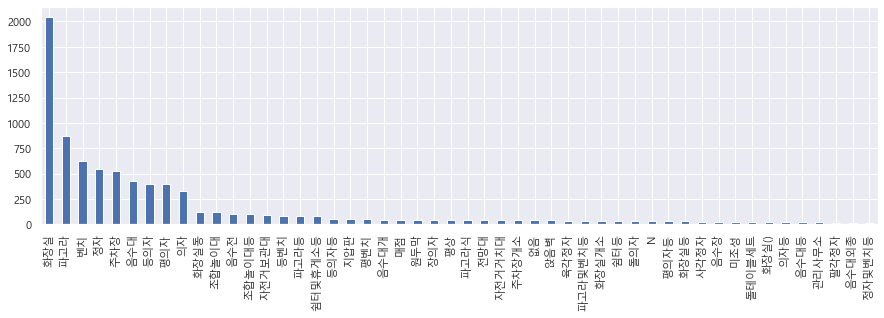

In [205]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_counts.head(50).plot.bar(figsize=(15,4))

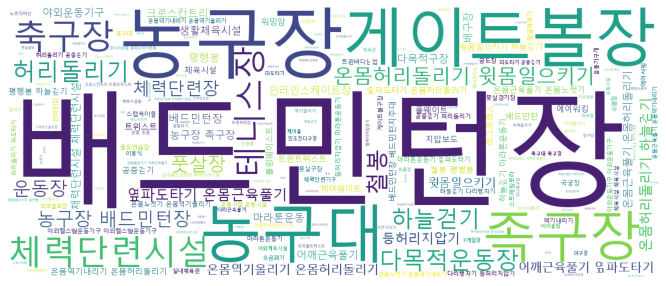

In [206]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.

wordcloud(fac)  # 화장실, 화장실동,화장실()....  - 데이터 전처리가 더 필요함을 알 수 있음

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [207]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다

facilities = ["화장실","주차장","음수대","파고라",'정자',"벤치","의자","놀이터","축구장","야영장","CCTV"]
facilities

df_fac = df_park[df_park["공원보유시설(편익시설)"].notnull()]

In [208]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.

for f in facilities:
    df_park[f] = df_park["공원보유시설(편익시설)"].str.contains(f)   # df_park["화장실"] = true, df_park["주차장"] = false...이런식으로
    
df_park.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
0,41135-00098,샘터공원,어린이공원,경기도 성남시 분당구 구미동 87,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시,경기도,성남시,1991.0,1.0,벤치,False,False,False,False,False,True,False,False,False,False,False


In [209]:
df_park[facilities]

,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
0,False,False,False,False,False,True,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19588,False,False,False,False,False,False,False,False,False,False,False
19589,False,False,False,False,False,False,False,False,False,False,False
19590,False,False,False,True,False,False,False,False,False,False,False
19591,False,False,False,True,False,False,False,False,False,False,False


In [210]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 

df_park[facilities].sum()

화장실     2343.0
주차장      633.0
음수대      535.0
파고라     1082.0
정자       664.0
벤치       817.0
의자      1042.0
놀이터       11.0
축구장        7.0
야영장        3.0
CCTV       0.0
dtype: float64

## 특정 정보 마스킹
### 전화번호 마스킹

In [211]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

# 모든 숫자 mask 처리
re.sub("\d", "*", "010-1234-5678")  # '***-****-****'

# 일부 숫자 mask 처리
re.sub("\d{3}", "***", "010-1234-5678")  # '***-***4-***8'

re.sub("\d{2}", "**", "010-1234-5678")   # '**0-****-****'


re.sub("(\d{3})-(\d{4})-(\d{4})", r"\1-****-\3", "010-1234-5678")   # '010-****-5678'

re.sub("(\d{3})-(\d{4})-(\d{4})", r"\1-\2-****", "010-1234-5678")   # '010-1234-****'

re.sub("(\d{3})-(\d{4})-(\d{4})", r"\1-\2-\3", "010-1234-5678")   # '010-1234-5678'

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{4})", r"\1-\2**-\4", "010-1234-5678")  # '010-12**-5678'

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")  # '010-12**-**78'

'010-12**-**78'

In [212]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")   # '010-123-5678' (적용안되고 그대로)


re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{1,2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")  # ''010-1**-**78'

'010-1**-**78'

In [213]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{1,2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")

'010-1**-**78'

In [214]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{1,2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")  # '+82-10-1234-5678'

'+82-10-1234-5678'

In [215]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.

phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    num = phone.split("-")    # ['+82', '10', '1234', '5678']
    num_len = len(num) // 2   # 리스트에서 가운데만 마스크 처리를 하고 싶기 때문에
    
    num[num_len] = re.sub("\w","*",num[num_len])   # '+82-10-****-5678'
    # 뒤 4자리의 앞부분도 ** 로 바꾸고 싶을 때
    num[-1] = re.sub("(\d{2})(\d{2})",r"**\2", num[-1])   # '+82-10-****-**78'
    
    
    return "-".join(num)
    
mask_phone_number(phone)    

'+82-10-****-**78'

In [216]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.
# 결측치 넣고 에러 메시지 확인한 후 함수 재정의


phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")    # ['+82', '10', '1234', '5678']
    num_len = len(num) // 2   # 리스트에서 가운데만 마스크 처리를 하고 싶기 때문에
    
    num[num_len] = re.sub("\w","*",num[num_len])   # '+82-10-****-5678'
    # 뒤 4자리의 앞부분도 ** 로 바꾸고 싶을 때
    num[-1] = re.sub("(\d{2})(\d{2})",r"**\2", num[-1])   # '+82-10-****-**78'
    
    
    return "-".join(num)
    
mask_phone_number(phone)    


mask_phone_number(np.nan)   # AttributeError: 'float' object has no attribute 'split'

nan

In [217]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용합니다.
# 가운데는 무조건 mask, 끝나는 번호의 앞 부분 2자리만 mask

df_park["전화번호(전처리)"] = df_park["전화번호"].map(mask_phone_number)
df_park[["공원명","전화번호","전화번호(전처리)"]].head()

,공원명,전화번호,전화번호(전처리)
0,샘터공원,031-729-7461,031-***-**61
1,제2풍영정,062-960-8704,062-***-**04
2,맑은샘,062-960-8712,062-***-**12
3,야호숲,062-960-8712,062-***-**12
4,풍영정천,062-960-8712,062-***-**12


### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [218]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"

re.sub("[^@.]","*",email)

'*******@****.***'

In [219]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"

address, domain = email.split("@")
mask = re.sub("\w","*",address[1:-1])  # 맨 처음 문자랑 마지막 문자만 제외하고 추출

# address[0]+mask+address[-1]+"@"+domain
print(f"{address[0]}{mask}{address[-1]}@{domain}")

a*****s@mail.com


In [220]:
# 위에서 작성한 예제를 함수로 만듭니다.

def mask_email(email):
    address, domain = email.split("@")
    mask = re.sub("\w","*",address[1:-1])  # 맨 처음 문자랑 마지막 문자만 제외하고 추출

    # address[0]+mask+address[-1]+"@"+domain
    return f"{address[0]}{mask}{address[-1]}@{domain}"
    
mask_email("1324ere@naver.com")

'1*****e@naver.com'

In [221]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.

mask_email("1234address_123@gmail.com")

'1*************3@gmail.com'

### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [222]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "32가1234"


re.sub("(\d{1,2})(\d{1})([가-힣])(\d{2})(\d{2})",r"*\2\3**\5",car_num)

'*2가**34'

In [223]:
# 맨 앞 한자리는 보이고, 숫자 나머지 마스크 처리, 한글 보여주고, 뒷 숫자 가운데 부분만 mask 처리

re.sub("(\d)([가-힣])(\d)(\d{2})(\d)",r"*\2\3**\5",car_num)

'3*가1**4'

In [224]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."

re.sub("(\d)([가-힣])(\d)(\d{2})(\d)",r"*\2\3**\5",car_num)

'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [225]:
data_types = df_park.dtypes
data_types

관리번호                    object
공원명                     object
공원구분                    object
소재지도로명주소                object
소재지지번주소                 object
위도                     float64
경도                     float64
공원면적                    object
공원보유시설(운동시설)            object
공원보유시설(유희시설)            object
공원보유시설(편익시설)            object
공원보유시설(교양시설)            object
공원보유시설(기타시설)            object
지정고시일           datetime64[ns]
관리기관명                   object
전화번호                    object
데이터기준일자                 object
제공기관코드                  object
제공기관명                   object
시도                      object
구군                      object
고시연도                   float64
고시월                    float64
편익시설                    object
화장실                     object
주차장                     object
음수대                     object
파고라                     object
정자                      object
벤치                      object
의자                      object
놀이터                     object
축구장     

In [226]:
# 동강이랑 달랐던거 - 공원면적이 float 타입이 아니라 object로 들어가 있음
# 수치형 데이터로 변경하기

df_park["공원면적"] = df_park["공원면적"].apply(lambda x: float(x.split()[0].replace(',', '')))



In [227]:
# data_types 변수에 데이터 타입만 따로 모으기

data_types = df_park.dtypes
data_types

관리번호                    object
공원명                     object
공원구분                    object
소재지도로명주소                object
소재지지번주소                 object
위도                     float64
경도                     float64
공원면적                   float64
공원보유시설(운동시설)            object
공원보유시설(유희시설)            object
공원보유시설(편익시설)            object
공원보유시설(교양시설)            object
공원보유시설(기타시설)            object
지정고시일           datetime64[ns]
관리기관명                   object
전화번호                    object
데이터기준일자                 object
제공기관코드                  object
제공기관명                   object
시도                      object
구군                      object
고시연도                   float64
고시월                    float64
편익시설                    object
화장실                     object
주차장                     object
음수대                     object
파고라                     object
정자                      object
벤치                      object
의자                      object
놀이터                     object
축구장     

## 수치형 변수 요약

In [228]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.




var_numbers = data_types[df_park.dtypes != object]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

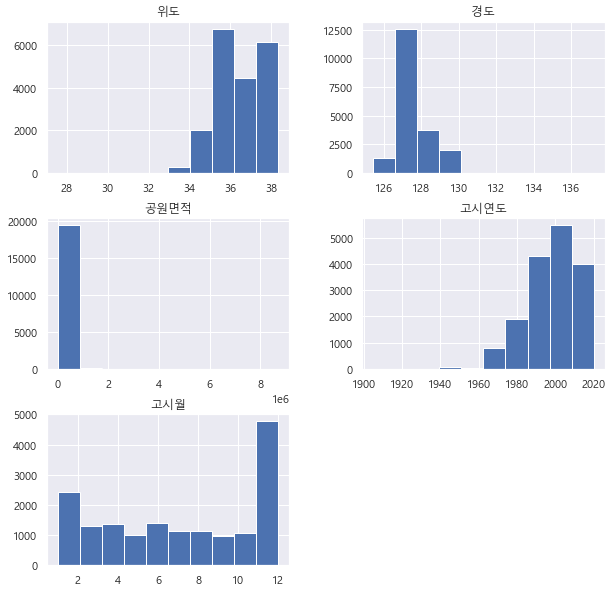

In [229]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.

# 원래 histogram 을 그리면 기본적으로 수치형만 가져다가 그림
h = df_park.hist(figsize=(10,10))

In [230]:
# describe 를 통해 요약합니다.

df_park.describe()

,위도,경도,공원면적,고시연도,고시월
count,19593.000000,19593.000000,1.959300e+04,16604.000000,16604.000000
mean,36.338749,127.524585,3.719539e+04,1997.716333,7.110034
std,1.064608,0.875285,2.140093e+05,13.469948,3.750275
min,27.551606,125.430955,0.000000e+00,1905.000000,1.000000
25%,35.255135,126.881875,1.505000e+03,1989.000000,4.000000
50%,36.374582,127.123134,2.196000e+03,2001.000000,7.000000
75%,37.400372,128.353493,1.035000e+04,2008.000000,11.000000
max,38.350990,137.202661,8.703000e+06,2020.000000,12.000000


## 범주형 변수 요약

In [231]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.

var_objects = data_types[data_types == object]
var_objects = var_objects.index.tolist()
var_objects[-5:]   # tail() 과 같은 형태로 tail 을 쓸수 없어서 현재 리스트니까

['놀이터', '축구장', '야영장', 'CCTV', '전화번호(전처리)']

In [232]:
# 문자열 타입의 데이터 describe 로 요약하기

df_park[var_objects].describe()    # 또 다른 방법 df_park.describe(include=object)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,19593,19593,19593,19593,19593,5046,7152,5397,1245,3166,18379,17934,19593,19593,19593,19593,19593,5397,5397,5397,5397,5397,5397,5397,5397,5397,5397,5397,5397,17934
unique,15734,13512,13,16267,16124,1660,1374,1224,390,1030,312,542,144,234,234,17,245,875,2,2,2,2,2,2,2,2,2,2,1,427
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,농구장,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-**01
freq,124,152,10618,18,18,286,1597,1046,306,200,1176,344,1332,1176,1176,3900,1176,1081,3054,4764,4862,4315,4733,4580,4355,5386,5390,5394,5397,696


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [233]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.


manage_category = pd.crosstab(index=df_park["관리기관명"], columns=df_park["공원구분"])
manage_category[manage_category["체육공원"] > 5].style.background_gradient()

공원구분,가로공원,근린공원,기타,도시농업공원,도시자연공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,0,33,0,0,0,2,5,25,4,68,4,6
경기도 시흥시청,0,37,0,1,0,0,7,6,3,72,0,6
경상남도 창원시청,0,224,0,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,0,11,2,0,0,0,3,10,0,49,1,6
성남시 공원과,0,50,0,0,0,1,0,0,0,0,2,6
전라남도 장성군청,0,14,0,0,0,0,4,118,2,10,2,6
평택시청(공원과),0,118,0,1,0,1,8,58,31,213,3,7


In [234]:
# "시도" 별 "공원구분" 의 수를 구합니다.

city_category = pd.crosstab(index=df_park["시도"], columns=df_park["공원구분"])
city_category.style.background_gradient()

공원구분,가로공원,근린공원,기타,도시농업공원,도시자연공원,마을마당,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,,,,
강원도,0,158,8,3,0,0,1,8,130,11,422,5,8
경기도,0,964,23,2,0,0,13,102,493,90,2091,36,86
경상남도,0,398,0,3,0,0,8,26,184,17,1180,12,32
경상북도,0,177,3,0,0,0,0,19,100,28,575,11,7
광주광역시,0,208,0,1,0,0,3,3,79,9,540,9,4
대구광역시,0,136,4,0,0,0,1,6,61,8,385,3,10
대전광역시,0,99,2,0,0,0,1,12,49,12,314,1,9
부산광역시,0,152,16,1,0,0,2,18,101,9,385,3,3
서울특별시,2,350,70,2,2,49,1,21,205,4,1133,13,4


# 시도별 공원 분포

## 시도별 공원 비율

In [235]:
# 시도별로 합계 데이터와 비율을 구해 데이터 프레임 형태로 작성

city_count = df_park["시도"].value_counts().to_frame()
city_mean = df_park["시도"].value_counts(normalize=True).to_frame()

city_count

,시도
경기도,3900
전라남도,2036
경상남도,1860
서울특별시,1856
충청남도,1691
전라북도,1117
경상북도,920
충청북도,915
울산광역시,883
광주광역시,856


In [236]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.


# city = city_count.merge(city_mean, left_index=True, right_index=True)
city = pd.merge(left=city_count,right=city_mean,left_index=True, right_index=True)
city.columns = ["합계","비율"]
city

,합계,비율
경기도,3900,0.199051
전라남도,2036,0.103915
경상남도,1860,0.094932
서울특별시,1856,0.094728
충청남도,1691,0.086306
전라북도,1117,0.057010
경상북도,920,0.046956
충청북도,915,0.046700
울산광역시,883,0.045067
광주광역시,856,0.043689


In [237]:
city.style.background_gradient()

,합계,비율
경기도,3900,0.199051
전라남도,2036,0.103915
경상남도,1860,0.094932
서울특별시,1856,0.094728
충청남도,1691,0.086306
전라북도,1117,0.057010
경상북도,920,0.046956
충청북도,915,0.046700
울산광역시,883,0.045067
광주광역시,856,0.043689


## 공원구분별 분포

In [241]:
# df_park_extract 공원면적도 데이터 타입 변경하기

df_park_extract["공원면적"] = df_park_extract["공원면적"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [242]:
df_park_extract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19591 entries, 0 to 19592
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          19591 non-null  object 
 1   공원명           19591 non-null  object 
 2   공원구분          19591 non-null  object 
 3   소재지도로명주소      19591 non-null  object 
 4   소재지지번주소       19591 non-null  object 
 5   위도            19591 non-null  float64
 6   경도            19591 non-null  float64
 7   공원면적          19591 non-null  float64
 8   공원보유시설(운동시설)  5046 non-null   object 
 9   공원보유시설(유희시설)  7152 non-null   object 
 10  공원보유시설(편익시설)  5397 non-null   object 
 11  공원보유시설(교양시설)  1245 non-null   object 
 12  공원보유시설(기타시설)  3166 non-null   object 
 13  지정고시일         16602 non-null  object 
 14  관리기관명         18377 non-null  object 
 15  전화번호          17932 non-null  object 
 16  데이터기준일자       19591 non-null  object 
 17  제공기관코드        19591 non-null  object 
 18  제공기관명         19591 non-nu

<AxesSubplot:xlabel='경도', ylabel='위도'>

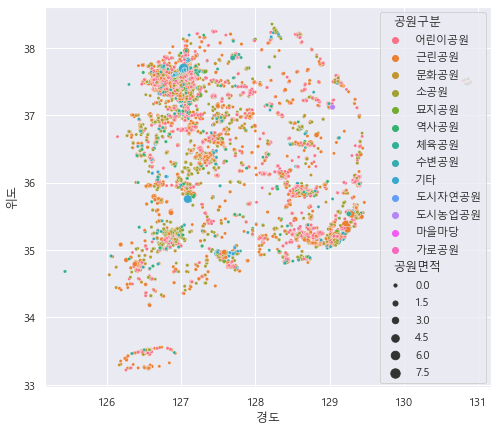

In [246]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park_extract 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.

plt.figure(figsize=(8,7))
sns.scatterplot(data=df_park_extract, x="경도", y="위도", hue="공원구분", size="공원면적", sizes=(10,100))

## 시도별 공원분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

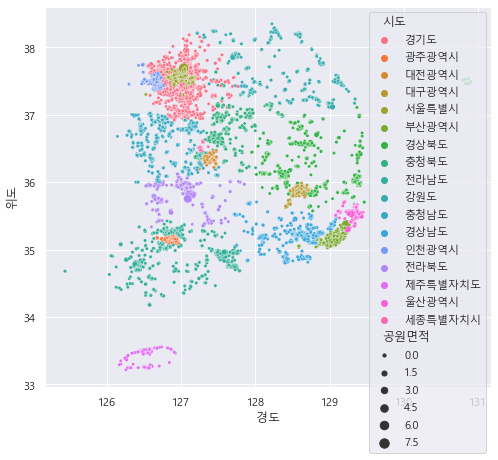

In [247]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.


plt.figure(figsize=(8,7))
sns.scatterplot(data=df_park_extract, x="경도", y="위도", hue="시도", size="공원면적", sizes=(10,100))

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='count', ylabel='시도'>

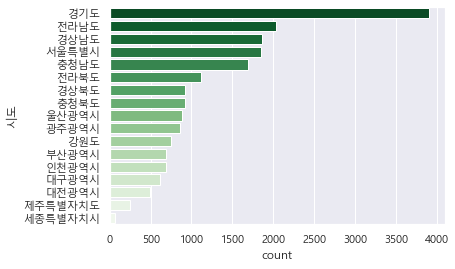

In [98]:
# countplot 으로 시도별 빈도수를 그립니다.

# 위,경도 값을 안 쓰기 때문에 원본으로 그림
sns.countplot(data=df_park,y="시도", order=city_count.index,palette="Greens_r")

## 특정 공원구분 가져오기

In [127]:
# "공원구분"별로 빈도수를 구합니다.

df_park["공원구분"].value_counts()

어린이공원     10618
근린공원       4547
소공원        2917
수변공원        348
문화공원        341
기타          270
체육공원        251
역사공원        182
묘지공원         51
마을마당         49
도시농업공원       14
도시자연공원        3
가로공원          2
Name: 공원구분, dtype: int64

In [248]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*'

park = df_park[df_park["공원구분"].str.match(park_type)]
park.shape

(1122, 36)

In [249]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.

var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [250]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 

var_pair = var_numbers.copy()
var_pair.append("공원구분")
var_pair

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [251]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list

var_pair.remove("지정고시일")
var_pair.remove("고시연도")
var_pair.remove("고시월")
var_pair

['위도', '경도', '공원면적', '공원구분']

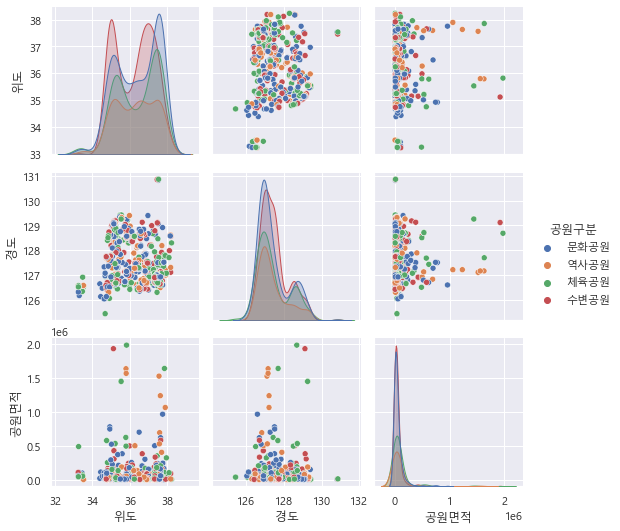

In [254]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.

park[var_pair]

sns.pairplot(data=park[var_pair], hue="공원구분")

## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [258]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.

park_size = pd.pivot_table(data=df_park, index="시도", values="공원면적", aggfunc=["count","mean","median"])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,754,33718.694695,1973.500000
경기도,3900,26704.588487,2621.000000
경상남도,1860,50564.794032,2154.550000
경상북도,920,30616.133587,2161.000000
광주광역시,856,32028.081168,2331.800000
대구광역시,614,33066.850000,2062.150000
대전광역시,499,36272.649098,2075.000000
부산광역시,690,57134.499899,2173.650000


## 내가 사는 지역의 공원을 지도에 표시해 보기

In [271]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.

df_sn = df_park[(df_park["시도"]=='경기도') & (df_park["구군"] == "성남시")]
df_sn.shape

(194, 36)

In [272]:
# 위의 결과를 확인하기 위해 "시도", "구군", "공원명" 컬럼만 미리보기 합니다.

df_sn[["시도","구군","공원명"]].head()

,시도,구군,공원명
0,경기도,성남시,샘터공원
120,경기도,성남시,오야소공원
183,경기도,성남시,종달새공원
200,경기도,성남시,점골공원
201,경기도,성남시,상희공원


### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [273]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.
# 찾고 공원명, 위도, 경도만 보기

df_sn.loc[df_sn["공원명"].str.contains("화랑"),["공원명","위도","경도"]]

,공원명,위도,경도
239,판교제8호(화랑)공원,37.397084,127.106226


In [275]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 

cols =['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)']
df_sn.loc[df_sn["공원명"].str.contains("화랑"),cols]

,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설)
239,"체력단련장, 배드민턴장",NaN,음수전,"생태학습원, 야외음악당"


###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [280]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

import folium

m = folium.Map([37.397084,127.106226], zoom_start=13)

for n in df_sn.index:
    lat = df_sn.loc[n, "위도"]
    long = df_sn.loc[n, "경도"]
    tooltip = df_sn.loc[n, "공원명"] + df_sn.loc[n, "소재지도로명주소"]
    folium.Marker([lat,long], tooltip=tooltip).add_to(m)   

m.save("화랑공원.html")
m